In [25]:
import torch
import matplotlib.pyplot as plt

In [37]:
X0 = torch.rand(10,2) + torch.Tensor([[1,1]])
X1 = torch.rand(10,2) + torch.Tensor([[3,2]])
X2 = torch.rand(10,2) + torch.Tensor([[1,2.5]])
X = torch.cat((torch.cat((X0,X1,X2),0),torch.ones(30,1)),1)

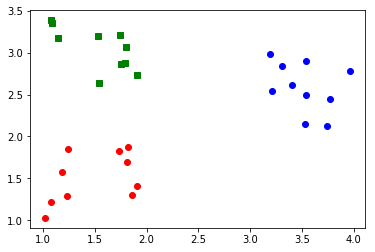

In [40]:
plt.plot(X0[:,0].numpy(),X0[:,1].numpy(),'ro')
plt.plot(X1[:,0].numpy(),X1[:,1].numpy(),'bo')
plt.plot(X2[:,0].numpy(),X2[:,1].numpy(),'gs')
plt.show()

In [41]:
Y = torch.zeros(30,3)
for i in range(3):
    Y[i*10:i*10+10,i] += 1

In [42]:
def softmax(w, x):
    return torch.exp(x.mm(w)) / (torch.sum(torch.exp(x.mm(w))))

def softmax_regression(X,y,iter=1000,lr=0.005):
    it = 0
    w = torch.rand(X.shape[1], y.shape[1])
    while it < iter:
        it+=1
        for i in range(len(X)):
            x = X[i].view(1,-1)
            w -= lr * x.t() * (softmax(w,x) - y[i].view(1,-1))
    return w


In [43]:
w = softmax_regression(X,Y,100)
w

tensor([[ 0.6911,  2.0576, -0.5771],
        [ 0.1478, -0.3216,  1.9911],
        [ 1.5778, -0.1704, -0.0947]])

In [44]:
index = 18
print(softmax(w, X[index].view(1,-1)), Y[index])

tensor([[0.1505, 0.8025, 0.0470]]) tensor([0., 1., 0.])


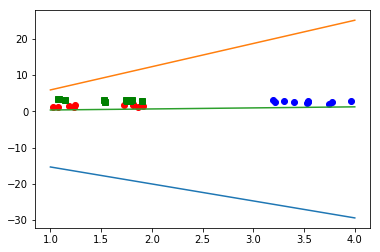

In [45]:
def draw_line(w):
    x1,x2 = 1,4
    a,b,c = w[0],w[1],w[2]
    ab = a/b
    cb = c/b
    plt.plot([x1,x2],[-ab*x1-cb,-ab*x2-cb])

plt.plot(X0[:,0].numpy(),X0[:,1].numpy(),'ro')
plt.plot(X1[:,0].numpy(),X1[:,1].numpy(),'bo')
plt.plot(X2[:,0].numpy(),X2[:,1].numpy(),'gs')
draw_line(w[:,0].numpy())
draw_line(w[:,1].numpy())
draw_line(w[:,2].numpy())
plt.show()
